In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report


from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
     

In [3]:
df = pd.read_csv("Iris.csv")

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [13]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [17]:
df.describe(include= 'all').round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


In [19]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


In [21]:
data=df.iloc[:,1:]
     

In [25]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


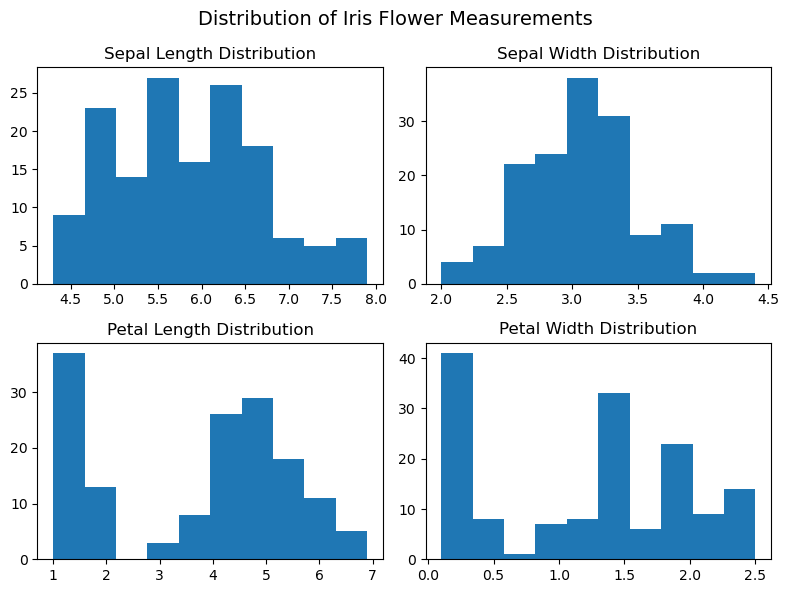

In [27]:
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

plt.subplot(2, 2, 1)  
plt.hist(data['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  
plt.hist(data['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  
plt.hist(data['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4) 
plt.hist(data['PetalWidthCm'])
plt.title('Petal Width Distribution')

plt.tight_layout() 
plt.show()

In [29]:
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

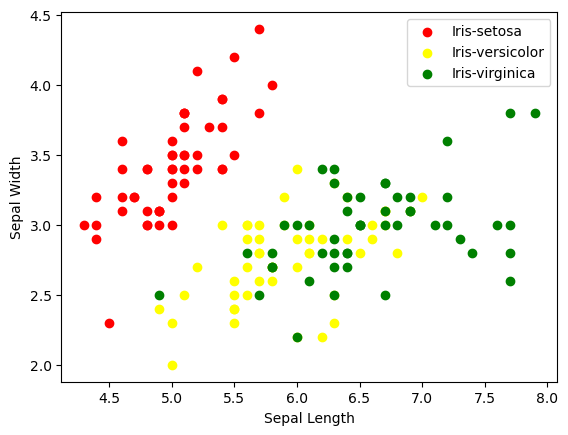

In [31]:
for i in range(3):
    x = data[data['Species'] == species[i]]

    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])


plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')


plt.legend()

plt.show()
     

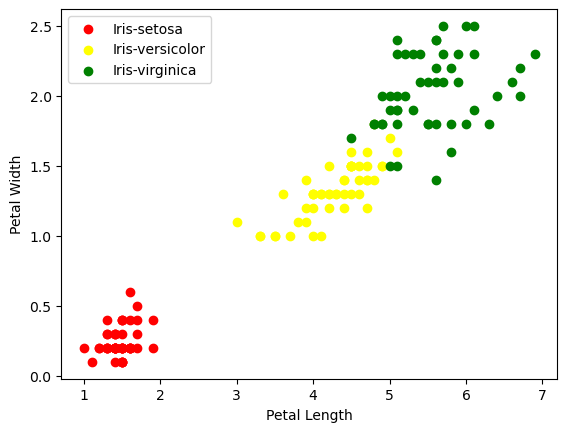

In [33]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.legend()

plt.show()

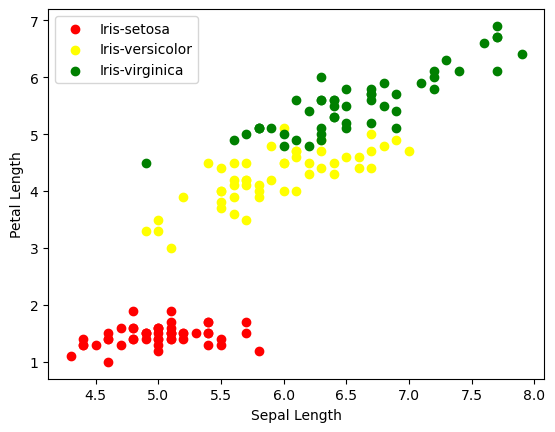

In [35]:
for i in range(3):
    x = data[data['Species'] == species[i]]

    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.legend()

plt.show()
     

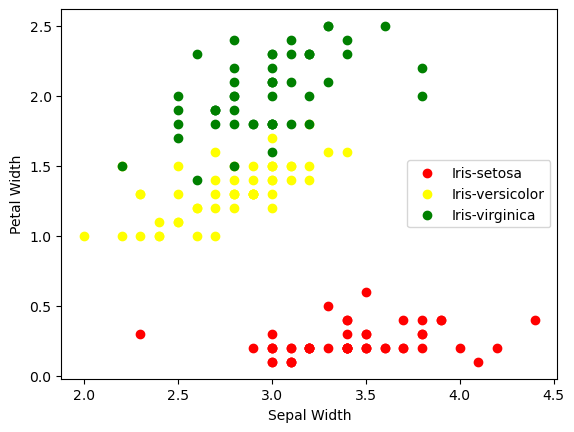

In [37]:
for i in range(3):
    x = data[data['Species'] == species[i]]

    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

plt.legend()
plt.show()
     

In [43]:
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

unique_species = data['Species'].unique()

print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


In [45]:
x=data.drop(columns=['Species'], axis=1)
y=data['Species']

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)


In [49]:
y_train.value_counts()

Species
2    37
1    34
0    34
Name: count, dtype: int64

In [51]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [53]:
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])
     


In [55]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)


Confusion Matrix:


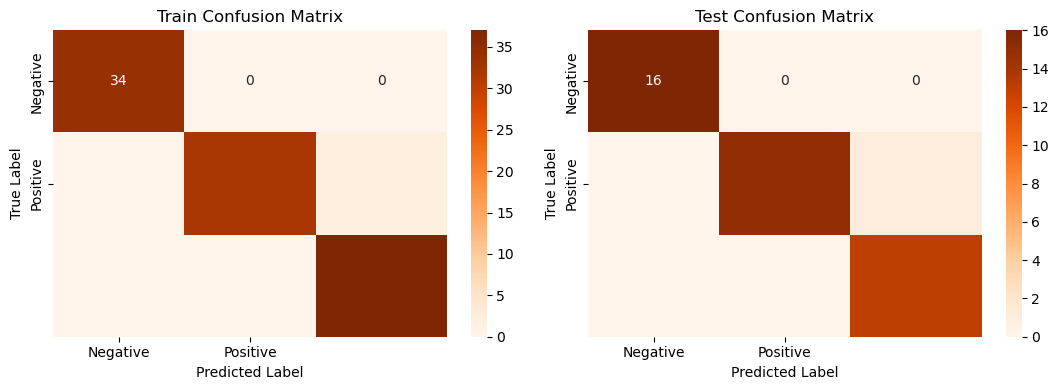


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    1        | 0.941176 |   0.969697 |  34        |
| 2            |    0.948718 | 1        |   0.973684 |  37        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.982906 | 0.980392 |   0.981127 | 105        |
| weighted avg |    0.981929 | 0.980952 |   0.980914 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [57]:
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [59]:
score['Logistic regression'] = lr_score
score
     

,Logistic regression
Precision Train,0.981929
Precision Test,0.979365
Recall Train,0.980952
Recall Test,0.977778
Accuracy Train,0.980952
Accuracy Test,0.977778
F1 macro Train,0.980914
F1 macro Test,0.977831


In [61]:

# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


In [63]:
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)
     



Confusion Matrix:


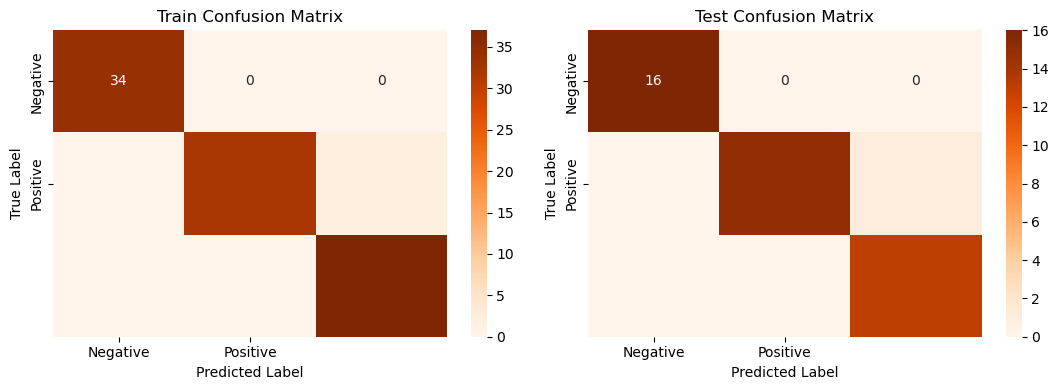


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    1        | 0.941176 |   0.969697 |  34        |
| 2            |    0.948718 | 1        |   0.973684 |  37        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.982906 | 0.980392 |   0.981127 | 105        |
| weighted avg |    0.981929 | 0.980952 |   0.980914 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [65]:
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [67]:
score['Logistic regression tuned'] = lr_score2

In [69]:
score

,Logistic regression,Logistic regression tuned
Precision Train,0.981929,0.981929
Precision Test,0.979365,0.979365
Recall Train,0.980952,0.980952
Recall Test,0.977778,0.977778
Accuracy Train,0.980952,0.980952
Accuracy Test,0.977778,0.977778
F1 macro Train,0.980914,0.980914
F1 macro Test,0.977831,0.977831


In [71]:
dt_model = DecisionTreeClassifier(random_state=20)


Confusion Matrix:


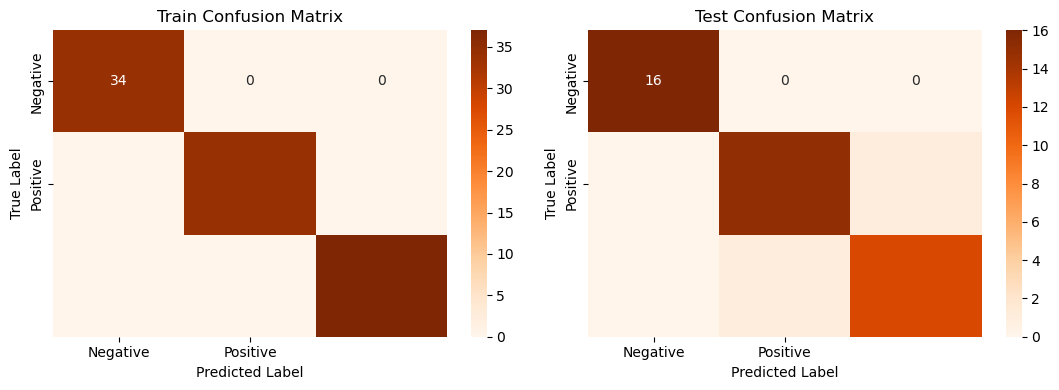


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        34 |
| 1            |           1 |        1 |          1 |        34 |
| 2            |           1 |        1 |          1 |        37 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    0.9375   | 0.9375   |   0.9375   | 16        |
| 2            |    0.923077 | 0.923077 |   0.923077 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [73]:
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)


In [75]:
score['Decision Tree'] = dt_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.981929,0.981929,1.000000
Precision Test,0.979365,0.979365,0.955556
Recall Train,0.980952,0.980952,1.000000
Recall Test,0.977778,0.977778,0.955556
Accuracy Train,0.980952,0.980952,1.000000
Accuracy Test,0.977778,0.977778,0.955556
F1 macro Train,0.980914,0.980914,1.000000
F1 macro Test,0.977831,0.977831,0.955556


In [77]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)
     

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [79]:
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)
     


Confusion Matrix:


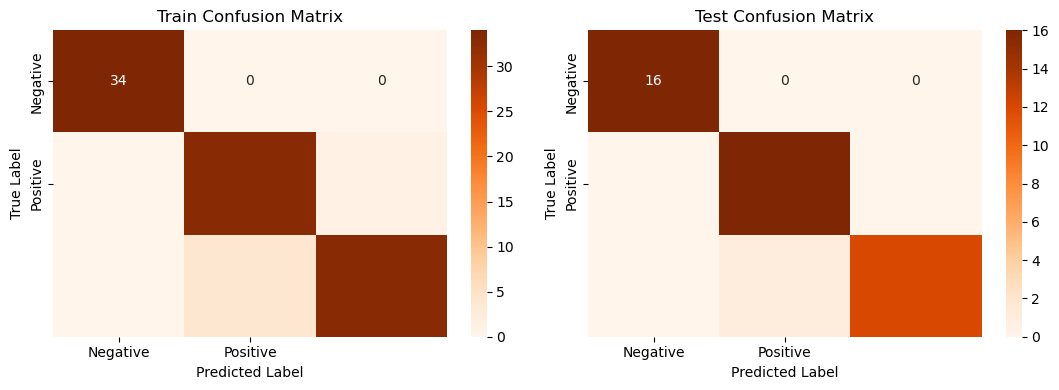


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    0.891892 | 0.970588 |   0.929577 |  34        |
| 2            |    0.970588 | 0.891892 |   0.929577 |  37        |
| accuracy     |    0.952381 | 0.952381 |   0.952381 |   0.952381 |
| macro avg    |    0.95416  | 0.95416  |   0.953052 | 105        |
| weighted avg |    0.954629 | 0.952381 |   0.952381 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    0.941176 | 1        |   0.969697 | 16        |
| 2            |    1        | 0.923077 |   0.96     | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [82]:
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)
     

In [84]:
score['Decision Tree tuned'] = dt2_score

In [86]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.981929,0.981929,1.000000,0.954629
Precision Test,0.979365,0.979365,0.955556,0.979085
Recall Train,0.980952,0.980952,1.000000,0.952381
Recall Test,0.977778,0.977778,0.955556,0.977778
Accuracy Train,0.980952,0.980952,1.000000,0.952381
Accuracy Test,0.977778,0.977778,0.955556,0.977778
F1 macro Train,0.980914,0.980914,1.000000,0.952381
F1 macro Test,0.977831,0.977831,0.955556,0.977670


In [88]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)


Confusion Matrix:


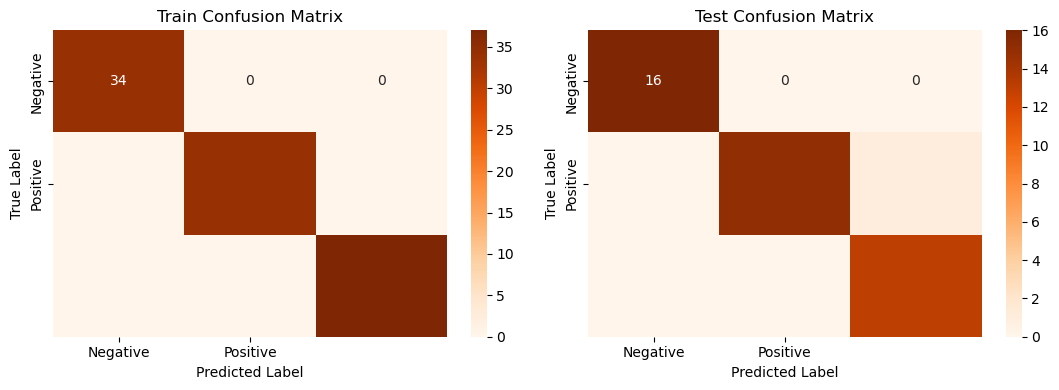


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        34 |
| 1            |           1 |        1 |          1 |        34 |
| 2            |           1 |        1 |          1 |        37 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [90]:
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [92]:
score['Random Forest'] = rf_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.981929,0.981929,1.000000,0.954629,1.000000
Precision Test,0.979365,0.979365,0.955556,0.979085,0.979365
Recall Train,0.980952,0.980952,1.000000,0.952381,1.000000
Recall Test,0.977778,0.977778,0.955556,0.977778,0.977778
Accuracy Train,0.980952,0.980952,1.000000,0.952381,1.000000
Accuracy Test,0.977778,0.977778,0.955556,0.977778,0.977778
F1 macro Train,0.980914,0.980914,1.000000,0.952381,1.000000
F1 macro Test,0.977831,0.977831,0.955556,0.977670,0.977831


In [94]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 14}


In [96]:
# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Confusion Matrix:


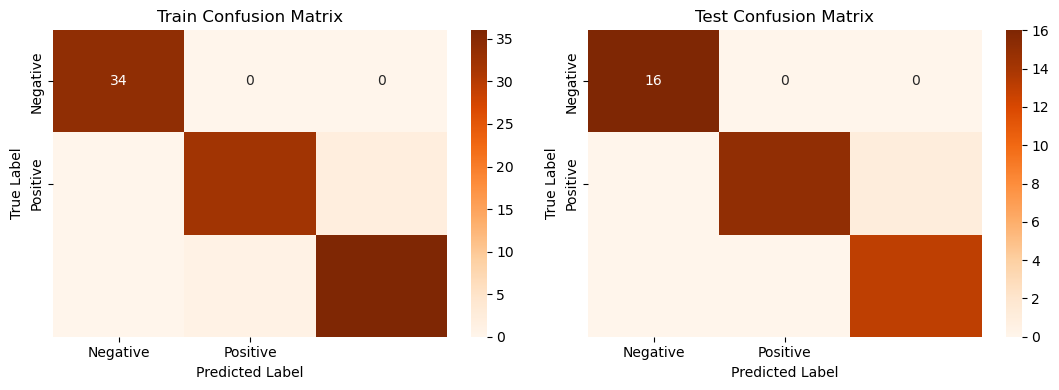


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    0.969697 | 0.941176 |   0.955224 |  34        |
| 2            |    0.947368 | 0.972973 |   0.96     |  37        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.972355 | 0.971383 |   0.971741 | 105        |
| weighted avg |    0.971641 | 0.971429 |   0.971406 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [98]:
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)


In [100]:
score['Random Forest tuned'] = rf2_score

In [102]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,0.981929,0.981929,1.000000,0.954629,1.000000,0.971641
Precision Test,0.979365,0.979365,0.955556,0.979085,0.979365,0.979365
Recall Train,0.980952,0.980952,1.000000,0.952381,1.000000,0.971429
Recall Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778
Accuracy Train,0.980952,0.980952,1.000000,0.952381,1.000000,0.971429
Accuracy Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778
F1 macro Train,0.980914,0.980914,1.000000,0.952381,1.000000,0.971406
F1 macro Test,0.977831,0.977831,0.955556,0.977670,0.977831,0.977831


In [104]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|
| Precision Train |              0.981929 |                    0.981929 |        1        |              0.954629 |        1        |              0.971641 |
| Precision Test  |              0.979365 |                    0.979365 |        0.955556 |              0.979085 |        0.979365 |              0.979365 |
| Recall Train    |              0.980952 |                    0.980952 |        1        |              0.952381 |        1        |              0.971429 |
| Recall Test     |              0.977778 |                    0.977778 |        0.955556 |              0.977778 |        0.977778 |              0.977778 |
| Accuracy Train  |              0.980952 |         

In [106]:

# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Decision Tree tuned,0.954629,0.979085,0.952381,0.977778,0.952381,0.977778,0.952381,0.977670
Random Forest tuned,0.971641,0.979365,0.971429,0.977778,0.971429,0.977778,0.971406,0.977831


In [108]:

def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [110]:

metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")
     

The best models are:
Precision: Random Forest tuned - 0.9794
Recall: Decision Tree tuned - 0.9778
Accuracy: Decision Tree tuned - 0.9778
F1 macro: Random Forest tuned - 0.9778


In [112]:
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| Decision Tree tuned    |       0.952381 |      0.977778 |
| Random Forest tuned    |       0.971429 |      0.977778 |


In [114]:
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']

In [116]:
x_rf = np.array([[5.1, 3.5, 1.4, 0.2]])

# Use the tuned random forest model (rf_model2) to make a prediction.
x_rf_prediction = rf_model2.predict(x_rf)
x_rf_prediction[0]

# Display the predicted category label.
print(Category_RF[int(x_rf_prediction[0])])

Iris-Setosa
